In [1]:
# Source for model framework: https://www.pluralsight.com/guides/linear-lasso-ridge-regression-scikit-learn
import pickle
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# adjust pandas printing

pd.options.display.max_colwidth = 200
pd.options.display.max_columns = None
pd.options.display.max_rows = 100

In [16]:
# import data from pickle 

dfRaw = pd.read_pickle('./censusMergedWithRedfin.pkl')
df = dfRaw.iloc[:,79:]
df = pd.concat([df, dfRaw.PRICE], axis=1)

In [22]:
df.describe().apply(lambda s: s.apply('{0:,.2f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
age_Median,"1,989.00",36.32,6.74,20.00,32.90,36.10,41.10,65.40
housing_OwnerOccupiedMedianValue,"1,989.00","224,498.57","117,811.59","40,700.00","142,500.00","190,700.00","301,700.00","603,200.00"
renting_MedianRentValue,"1,989.00","1,074.55",212.86,328.00,942.00,"1,047.00","1,144.00","1,832.00"
inequality_GiniIndex,"1,989.00",0.47,0.06,0.27,0.43,0.46,0.52,0.62
commute_pctLessThan34Mins,"1,987.00",0.83,0.06,0.58,0.80,0.84,0.87,0.97
bachelors_pctSTEM,"1,988.00",0.09,0.04,0.00,0.06,0.08,0.11,0.22
education_pctAdvancedDegree,"1,988.00",0.29,0.14,0.00,0.17,0.27,0.42,0.64
income_pctBelow50K,"1,988.00",0.44,0.15,0.17,0.31,0.42,0.54,1.00
income_pctAbove150K,"1,988.00",0.16,0.11,0.00,0.08,0.11,0.21,0.54
PRICE,"1,989.00","363,471.53","283,618.84","3,000.00","199,000.00","295,000.00","442,000.00","3,150,000.00"


In [14]:
len(np.unique(dfRaw['censusTract']))

82

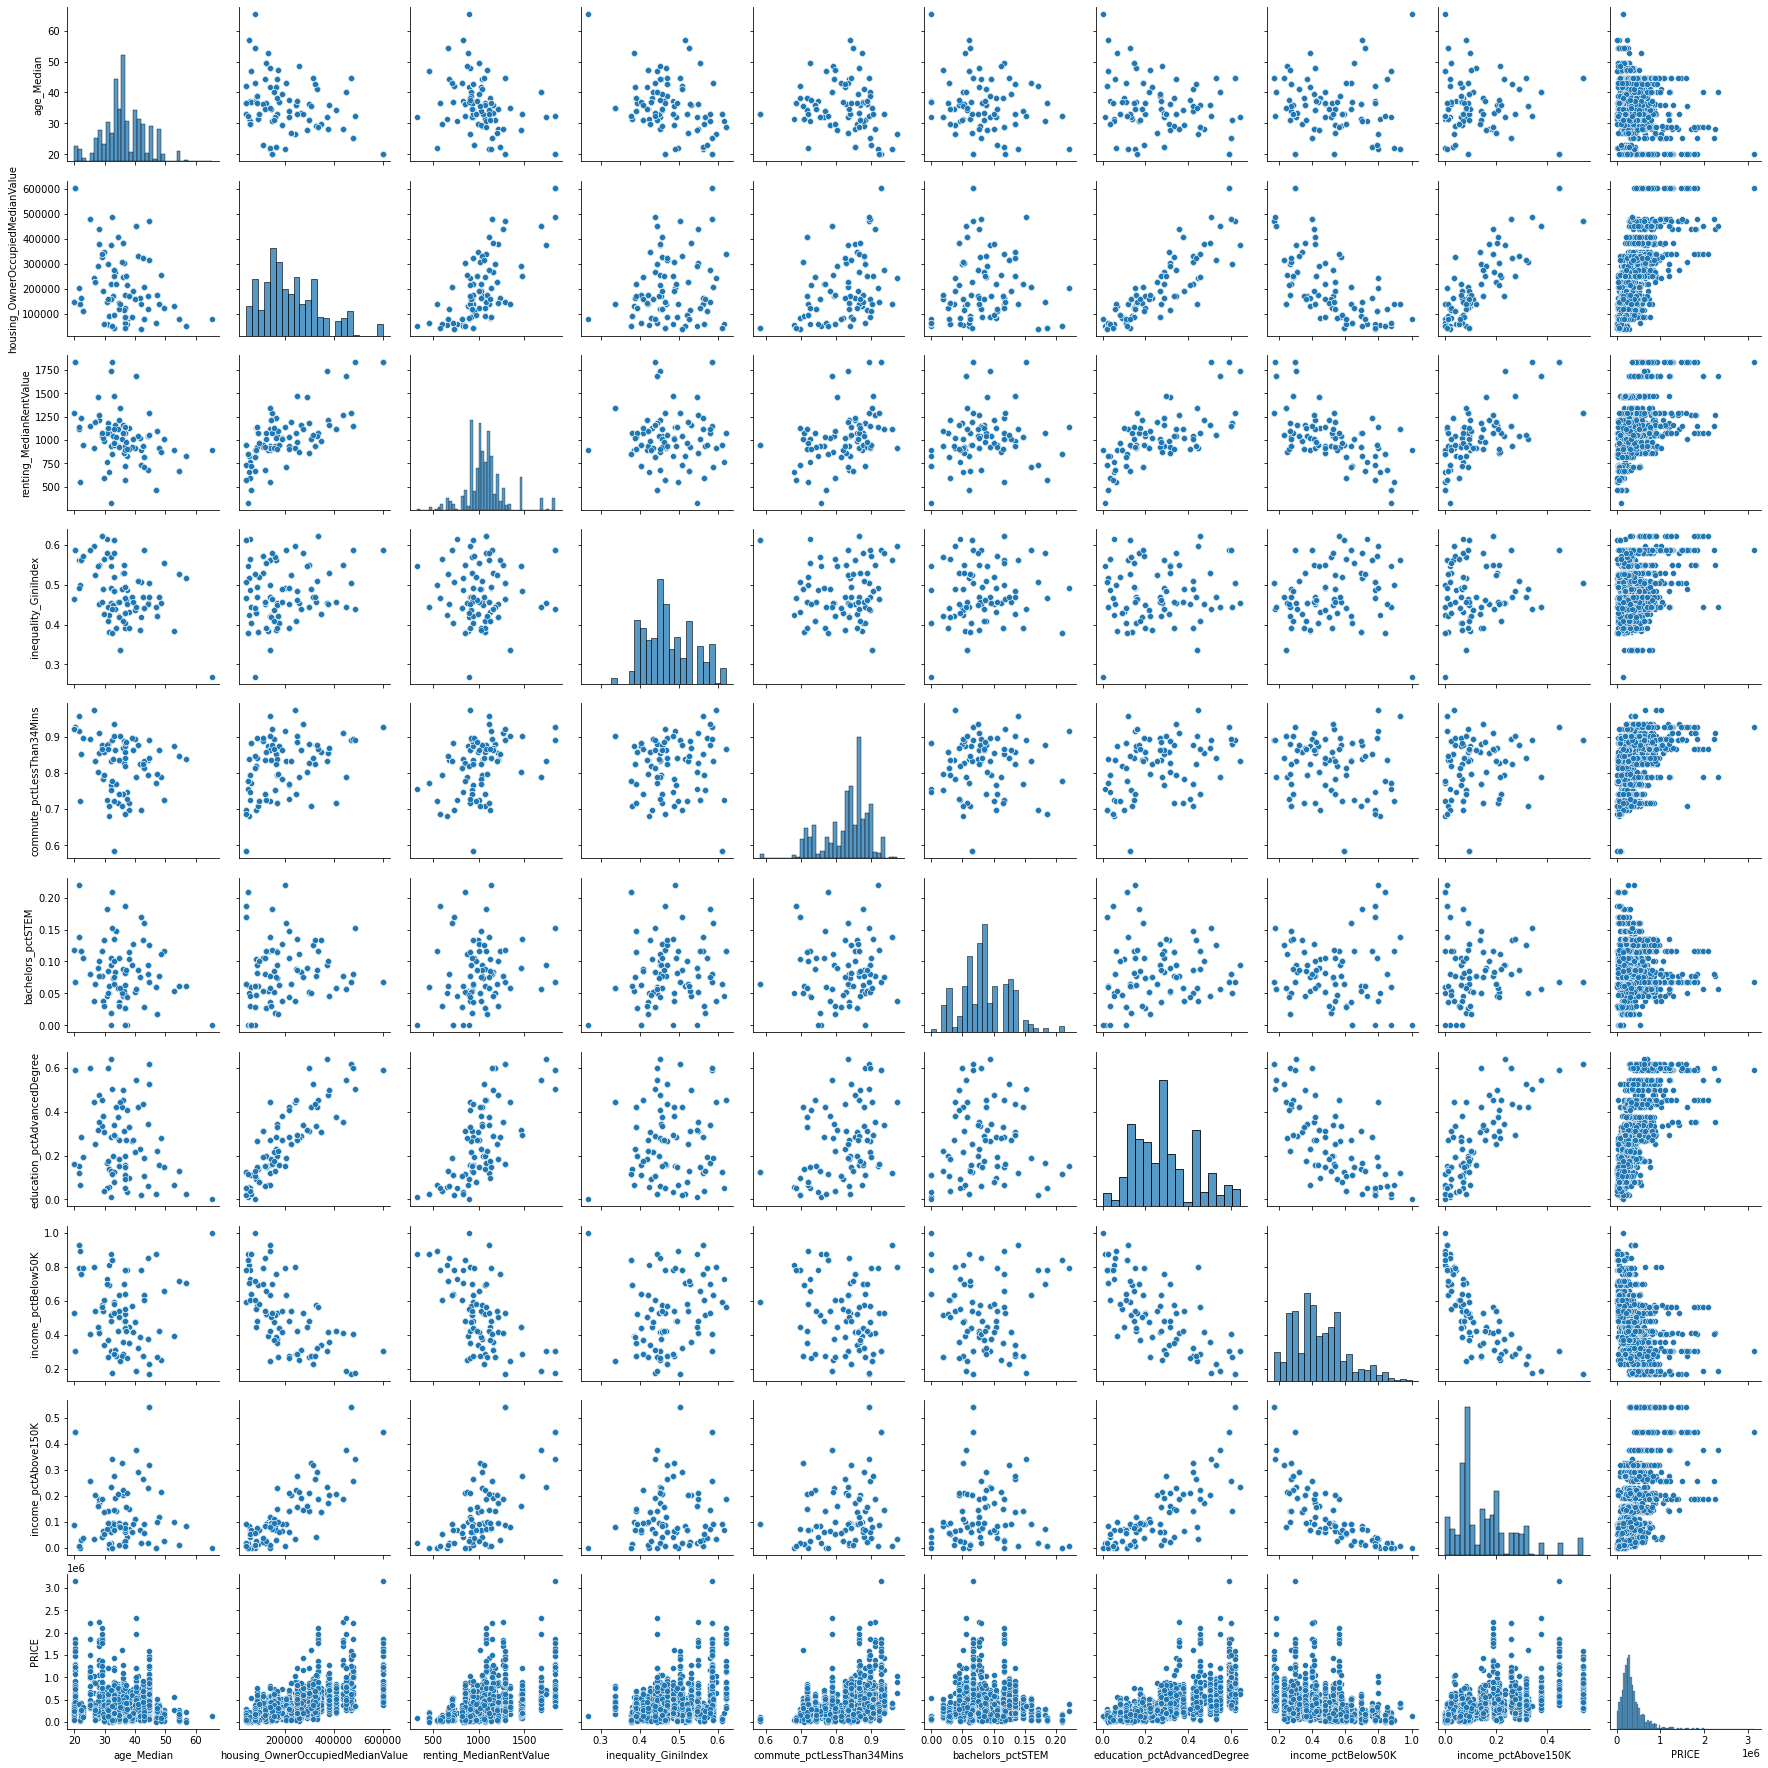

In [24]:
sns.pairplot(df)

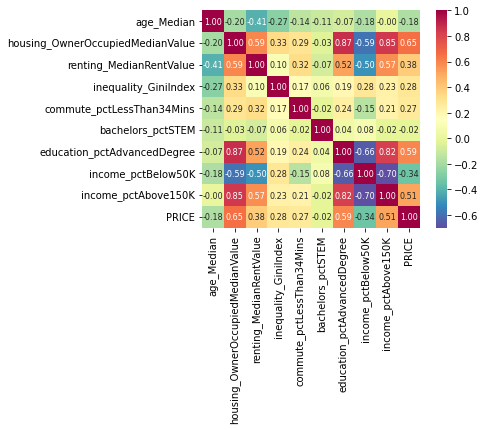

In [27]:
# source: https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee

corrmat = df.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 8}, 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="Spectral_r")
plt.show()

In [28]:
dfRaw['YEAR BUILT'].min()

1620.0